In [1]:
import sys
if '.' not in sys.path:
    sys.path.append('.')

from time import sleep
import numpy as np
import gym

import gymEnvs
from util import *
from smallmdp import *
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

# VALUE ITERATION

In [23]:
gamma=0.9
theta=1e-3
gambler = Gambler()
VI_pi, VI_V, VI_deltas, VI_mainLoopCounter, VI_duration = sbvaliter(gambler, gamma, theta)

Total iterations:67 Duration:0.005403041839599609
dict_values([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0])


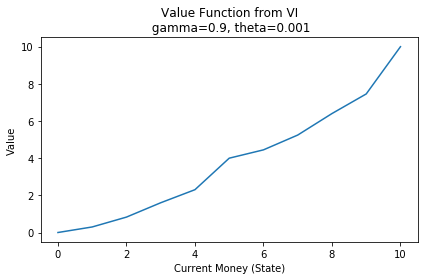

In [112]:
plt.plot(list(VI_V.values()))
plt.xlabel("Current Money (State)")
plt.ylabel("Value")
plt.title("Value Function from VI\n gamma={}, theta={}".format(gamma, theta))
plt.tight_layout()
plt.savefig("./Figures/gambler_VI_valfunc.png")

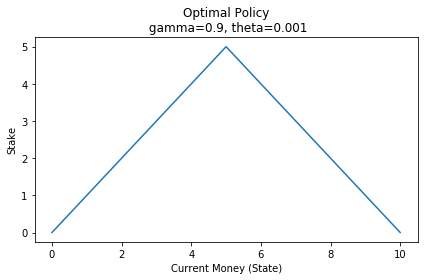

In [113]:
plt.plot(list(VI_pi.values()))
plt.xlabel("Current Money (State)")
plt.ylabel("Stake")
plt.title("Optimal Policy\n gamma={}, theta={}".format(gamma, theta))
plt.tight_layout()
plt.savefig("./Figures/gambler_VI_policy.png")

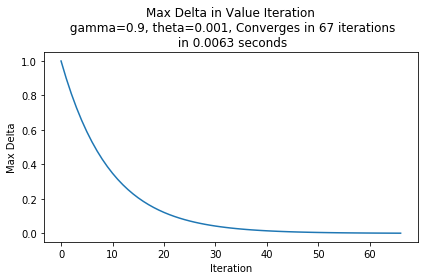

In [114]:
plt.plot(VI_deltas)
plt.xlabel("Iteration")
plt.ylabel("Max Delta")
plt.title("Max Delta in Value Iteration\n gamma={}, theta={}, Converges in {} iterations\n in {} seconds".format(gamma, theta, VI_mainLoopCounter, round(VI_duration,4)))
plt.tight_layout()
plt.savefig("./Figures/gambler_VI_maxdelta.png")

# POLICY ITERATION

In [25]:
gambler = Gambler()
gamma=0.9
theta=1e-3
PI_pi, PI_V, PI_deltas, polstable, PI_mainLoopCounter, PI_duration = sbpoliter(gambler, gamma, theta)

dict_values([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
Total iterations:2 Duration:0.002542734146118164


In [116]:
polstable

True

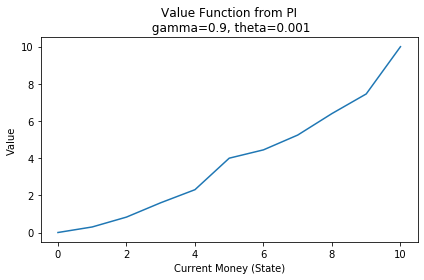

In [117]:
plt.plot(list(PI_V.values()))
plt.xlabel("Current Money (State)")
plt.ylabel("Value")
plt.title("Value Function from PI\n gamma={}, theta={}".format(gamma, theta))
plt.tight_layout()
plt.savefig("./Figures/gambler_PI_valfunc.png")

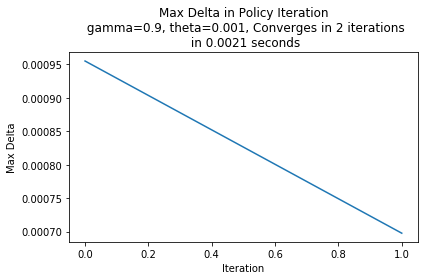

In [118]:
plt.plot(PI_deltas)
plt.xlabel("Iteration")
plt.ylabel("Max Delta")
plt.title("Max Delta in Policy Iteration\n gamma={}, theta={}, Converges in {} iterations\n in {} seconds".format(gamma, theta, PI_mainLoopCounter, round(PI_duration,4)))
plt.tight_layout()
plt.savefig("./Figures/gambler_PI_maxdelta.png")

# They converge to the same policy

In [57]:
PI_pi==VI_pi

True

# QLEARNING

In [10]:
gambler = Gambler()
q, q_maxDeltas, q_rewards, q_episodeLengths, q_times, bestPi, bestSoFar = qlearningStoping(gambler,10000000, alpha=1, epsilon=1, gamma=0.999, epsilon_decay=0.999999, alpha_decay=0.999999, max_steps=10000)
q_pi = []
for s in gambler.allPossibleStates():
    best = max(gambler.availableActions(s), key=lambda a1: q[s, a1])
    q_pi.append(best)

Episode:100000, Reward Mean 250.0
Episode:200000, Reward Mean 238.22222222222223
Episode:300000, Reward Mean 243.44444444444446
Episode:400000, Reward Mean 302.22222222222223
Episode:500000, Reward Mean 284.1111111111111
Episode:600000, Reward Mean 269.22222222222223
Episode:700000, Reward Mean 354.3333333333333
Episode:800000, Reward Mean 311.77777777777777
Episode:900000, Reward Mean 327.0
Episode:1000000, Reward Mean 280.3333333333333
Episode:1100000, Reward Mean 258.6666666666667
Episode:1200000, Reward Mean 263.1111111111111
Episode:1300000, Reward Mean 270.6666666666667
Episode:1400000, Reward Mean 325.22222222222223
Episode:1500000, Reward Mean 182.55555555555554
Episode:1600000, Reward Mean 366.55555555555554
Episode:1700000, Reward Mean 244.22222222222223
Episode:1800000, Reward Mean 321.55555555555554
Episode:1900000, Reward Mean 284.22222222222223
Episode:2000000, Reward Mean 354.1111111111111
Episode:2100000, Reward Mean 233.0
Episode:2200000, Reward Mean 368.0
Episode:2300

# RESULTING POLICY FROM QLEARNING

In [11]:
bestPi

[0, 1, 2, 3, 1, 5, 1, 2, 2, 1, 0]

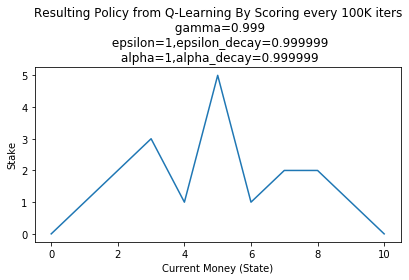

In [15]:
alpha=1
epsilon=1
gamma=0.999
epsilon_decay=0.999999
alpha_decay=0.999999
plt.plot(bestPi)
plt.xlabel("Current Money (State)")
plt.ylabel("Stake")
plt.title("Resulting Policy from Q-Learning By Scoring every 100K iters\n gamma={}\n epsilon={},epsilon_decay={}\n alpha={},alpha_decay={}".format(gamma, epsilon, epsilon_decay, alpha, alpha_decay))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_policy_different.png")

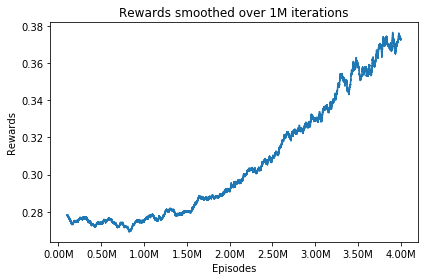

In [135]:
import matplotlib.ticker as ticker
plt.plot(pd.Series(q_rewards).rolling(100000,100000).mean())
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Rewards smoothed over 1M iterations")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_rewards_4M.png")

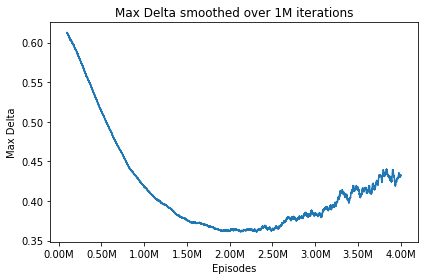

In [136]:
import matplotlib.ticker as ticker
plt.plot(pd.Series(q_maxDeltas).rolling(100000,100000).mean())
plt.xlabel("Episodes")
plt.ylabel("Max Delta")
plt.title("Max Delta smoothed over 1M iterations")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_maxdelta_4M.png")

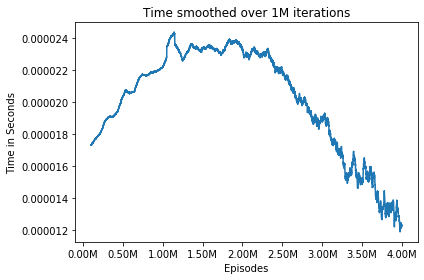

In [137]:
import matplotlib.ticker as ticker
plt.plot(pd.Series(q_times).rolling(100000,100000).mean())
plt.xlabel("Episodes")
plt.ylabel("Time in Seconds")
plt.title("Time smoothed over 1M iterations")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_time_4M.png")

# SCORING

# RANDOM POLICY

In [119]:
rews=[]
avgsteps=[]
for i in range(1000):
    pol = randomPolicy()
    for initialMoney in range(1,10):        
        steps, rew=score(pol, initialMoney, 1000)
        avgsteps.append(np.array(steps).mean())
        rews.append(rew)
rewsmean = np.array(rews).mean()
avgavgsteps = np.array(avgsteps).mean()

In [120]:
avgavgsteps,rewsmean

(3.287534222222222, 278.0701111111111)

# POLICY FROM PI/VI

In [28]:
rews_opt=[]
avgsteps_opt=[]
for initialMoney in range(1,10):
    stepsToReachGoal, totalWins = score(PI_pi, initialMoney, 100000)
    avgsteps_opt.append(np.array(stepsToReachGoal).mean())
    rews_opt.append(totalWins)

opt_rew_mean = np.array(rews_opt).mean()
opt_avgavgsteps = np.array(avgsteps_opt).mean()

In [29]:
opt_avgavgsteps, opt_rew_mean

(2.3454702071933706, 39150.11111111111)

# POLICY FROM QLEARNING

In [30]:
rews_q=[]
avgsteps_q=[]
for initialMoney in range(1,10):
    stepsToReachGoal, totalWins = score(bestPi, initialMoney, 100000)
    avgsteps_q.append(np.array(stepsToReachGoal).mean())
    rews_q.append(totalWins)

q_rew_mean = np.array(rews_q).mean()
q_avgavgsteps = np.array(avgsteps_q).mean()

In [31]:
q_avgavgsteps, q_rew_mean

(2.98464894184192, 39242.22222222222)